## Motivation

Often in science and engineering coursework, we are asked to determine the state of a system given the parameters of the system. For example, the relationship between the force exerted by a linear spring, *F*, and the displacement of the spring from its natural length, *x*, is usually represented by the model 

$$
\begin{align}
F = kx
\end{align}
$$

where *k* is the spring stiffness. We are then asked to compute the force for a given *k* and *x* value. 

However in practice, the stiffness and in general, most of the parameters of a system, are not known a *priori*. Instead, we are usually presented with data points about how the system has behaved in the past. For
our spring example, we may be given $(x, F)$ data pairs that have been previously recorded from an experiment. Ideally, all these data points would lie exactly on a line going through the origin (since there is no force at zero displacement). We could then measure the slope of this line and get our stiffness value for *k*. However,
practical data usually has some measurement noise because of sensor inaccuracy, measurement error, or a variety of other reasons. The following figure shows an example of what data might look like for a simple spring experiment. 

<img src="./spring_data.jpg" alt="spring experiment" title="Results from force-displacement experiment for spring (fictional). The theoretical linear relationship between force and displacement in a linear spring is F = kx . What do you think k should be given as the experimental data?" width="500"/>

This notebook teaches methods of finding the "most likely" model parameters given a set of data, _e.g._, how to find the spring stiffness in our mock experiment. By the end of this chapter you should understand how these methods choose model parameters, the importance of choosing the correct model, and how to implement these methods in.

---

In statistics, linear regression is a model that estimates the linear relationship between a scalar response (dependent variable) and one or more explanatory variables (regressor or independent variable). A model with exactly one explanatory variable is a simple linear regression; a model with two or more explanatory variables is a multiple linear regression. This term is distinct from multivariate linear regression, which predicts multiple correlated dependent variables rather than a single dependent variable.

In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Most commonly, the conditional mean of the response given the values of the explanatory variables (or predictors) is assumed to be an affine function of those values; less commonly, the conditional median or some other quantile is used. Like all forms of regression analysis, linear regression focuses on the conditional probability distribution of the response given the values of the predictors, rather than on the joint probability distribution of all of these variables, which is the domain of multivariate analysis.

Linear regression is also a type of machine learning algorithm, more specifically a supervised algorithm, that learns from the labelled datasets and maps the data points to the most optimized linear functions that can be used for prediction on new datasets.

Linear regression was the first type of regression analysis to be studied rigorously, and to be used extensively in practical applications.  This is because models which depend linearly on their unknown parameters are easier to fit than models which are non-linearly related to their parameters and because the statistical properties of the resulting estimators are easier to determine.

Linear regression has many practical uses. Most applications fall into one of the following two broad categories:

  * If the goal is error i.e. variance reduction in prediction or forecasting, linear regression can be used to fit a predictive model to an observed data set of values of the response and explanatory variables. After developing such a model, if additional values of the explanatory variables are collected without an accompanying response value, the fitted model can be used to make a prediction of the response.
  * If the goal is to explain variation in the response variable that can be attributed to variation in the explanatory variables, linear regression analysis can be applied to quantify the strength of the relationship between the response and the explanatory variables, and in particular to determine whether some explanatory variables may have no linear relationship with the response at all, or to identify which subsets of explanatory variables may contain redundant information about the response.

Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares cost function as in ridge regression (L2-norm penalty) and lasso (L1-norm penalty). Use of the Mean Squared Error (MSE) as the cost on a dataset that has many large outliers, can result in a model that fits the outliers more than the true data due to the higher importance assigned by MSE to large errors. So, cost functions that are robust to outliers should be used if the dataset has many large outliers. Conversely, the least squares approach can be used to fit models that are not linear models. Thus, although the terms "least squares" and "linear model" are closely linked, they are not synonymous. 

## Least Squares Regression Problem Statement

Given a set of independent data points $x_i$ and dependent data points $y_i, i = 1, \ldots, m$, we would like to find an **estimation function**, $\hat{y}(x)$, that describes the data as well as possible. Note that $\hat{y}$ can be a function of several variables, but for the sake of this discussion, we restrict the domain of $\hat{y}$ to be a single variable. In least squares regression, the estimation function must be a linear combination of **basis functions**, $f_i(x)$. That is, the estimation function must be of the form
$$
\hat{y}(x) = \sum_{i = 1}^n {\alpha}_i f_i(x)
$$
The scalars ${\alpha}_i$ are referred to as the **parameters** of the estimation function, and each basis function must be linearly independent from the others. In other words, in the proper "functional space" no basis function should be expressible as a linear combination of the other functions. Note: In general, there are significantly more data points, $m$, than basis functions, $n$ (i.e., $m >> n$).

**TRY IT!** 
Create an estimation function for the force-displacement relationship of a linear spring. Identify the basis function(s) and model parameters. 

The relationship between the force, $F$, and the displacement, $x$, can be described by the function $F(x) = kx$ where $k$ is the spring stiffness. The only basis function is the function $f_1(x) = x$ and the model parameter to find is ${\alpha}_1 = k$.

The goal of **least squares regression** is to find the parameters of the estimation function that minimize the **total squared error**, $E$, defined by $E = \sum_{i=1}^m (\hat{y} - y_i)^2$. The **individual errors** or **residuals** are defined as $e_i = (\hat{y} - y_i)$. If $e$ is the vector containing all the individual errors, then we are also trying to minimize $E = \|{e}\|_{2}^{2}$, which is the $L_2$ norm defined in the previous chapter.

In the next two sections we derive the least squares method of finding the desired parameters. The first derivation comes from linear algebra, and the second derivation comes from multivariable calculus. Although they are different derivations, they lead to the same least squares formula. You are free to focus on the section with which you are most comfortable.

## Least Squares Regression Derivation (Linear Algebra)

First, we enumerate the estimation of the data at each data point $x_i$

\begin{eqnarray*}
&&\hat{y}(x_1) = {\alpha}_1 f_1(x_1) + {\alpha}_2 f_2(x_1) + \cdots + {\alpha}_n f_n(x_1), \\
&&\hat{y}(x_2) = {\alpha}_1 f_1(x_2) + {\alpha}_2 f_2(x_2) + \cdots + {\alpha}_n f_n(x_2), \\
&&\qquad\qquad \qquad \qquad \quad \cdots\\
&&\hat{y}(x_m) = {\alpha}_1 f_1(x_m) + {\alpha}_2 f_2(x_m) + \cdots + {\alpha}_n f_n(x_m).\end{eqnarray*}

Let $X\in {\Bbb R}^n$ be a column vector such that the $i$-th element of $X$ contains the value of the $i$-th $x$-data point, $x_i, \hat{Y}$ be a column vector with elements, $\hat{Y}_i = \hat{y}(x_i), {\beta}$ be a column vector such that ${\beta}_i = {\alpha}_i, F_i(x)$ be a function that returns a column vector of $f_i(x)$ computed on every element of $x$, and $A$ be an $m \times n$ matrix such that the $i$-th column of $A$ is $F_i(x)$. Given this notation, the previous system of equations becomes $\hat{Y} = A{\beta}$.

Now if $Y$ is a column vector such that $Y_i = y_i$, the total squared error is given by $E = \|{\hat{Y} - Y}\|_{2}^2$. You can verify this by substituting the definition of the $L_2$ norm. Since we want to make $E$ as small as possible and norms are a measure of distance, this previous expression is equivalent to saying that we want $\hat{Y}$ and $Y$ to be a "close as possible." Note that in general $Y$ will not be in the range of $A$ and therefore $E > 0$.

Consider the following simplified depiction of the range of $A$; see the following figure. Note this is $\it not$ a plot of the data points $(x_i, y_i)$.

<img src="./Illustration_of_Least_Square_Regression.png" alt="Illustration of Least Square Regression" title="Illustration of the L2 projection of Y on the range of A" width="400"/>

From observation, the vector in the range of $A, \hat{Y}$, that is closest to $Y$ is the one that can point perpendicularly to $Y$. Therefore, we want a vector $Y - \hat{Y}$ that is perpendicular to the vector $\hat{Y}$.

Recall from Linear Algebra that two vectors are perpendicular, or orthogonal, if their dot product is 0. Noting that the dot product between two vectors, $v$ and $w$, can be written as ${\text{dot}}(v,w) = v^T w$, we can state that $\hat{Y}$ and $Y - \hat{Y}$ are perpendicular if ${\text{dot}}(\hat{Y}, Y - \hat{Y}) = 0$; therefore, $\hat{Y}^T (Y - \hat{Y}) = 0$, which is equivalent to $(A{\beta})^T(Y - A{\beta}) = 0$.

Noting that for two matrices $A$ and $B, (AB)^T = B^T A^T$ and using distributive properties of vector multiplication, this is equivalent to ${\beta}^T A^T Y - {\beta}^T A^T A {\beta} = {\beta}^T(A^T Y - A^T A {\beta}) = 0$. The solution, ${\beta} = \textbf{0}$, is a trivial solution, so we use $A^T Y - A^T A {\beta} = 0$ to find a more interesting solution. Solving this equation for ${\beta}$ gives the $\textbf{least squares regression formula}$:

$$
{\beta} = (A^T A)^{-1} A^T Y
$$

Note that $(A^T A)^{-1}A^T$ is called the **pseudo-inverse** of $A$ and exists when $m > n$ and $A$ has linearly independent columns. Proving the invertibility of $(A^T A)$ is outside the scope of this book, but it is always invertible except for some pathological cases.

## Simple example

In [1]:
# import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# create some fake data (note these are lists)
x = [5, 15, 25, 35, 45, 55]
y = [5, 20, 14, 32, 22, 38]

# convert to numpy arrays
xa = np.array(x)
ya = np.array(y)

In [3]:
# turn y into a column vector
ya = ya[:, np.newaxis]

# assemble matrix A
A = np.vstack([xa, np.ones(len(x))]).T

### compute directly using linear algebra

In [4]:
ATA = np.dot(A.T,A)
ATAi = np.linalg.inv(ATA)
ATy = np.dot(A.T,y)
alpha = np.dot(ATAi,ATy)
print(alpha)

[0.54       5.63333333]


In [5]:
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[0.54       5.63333333]


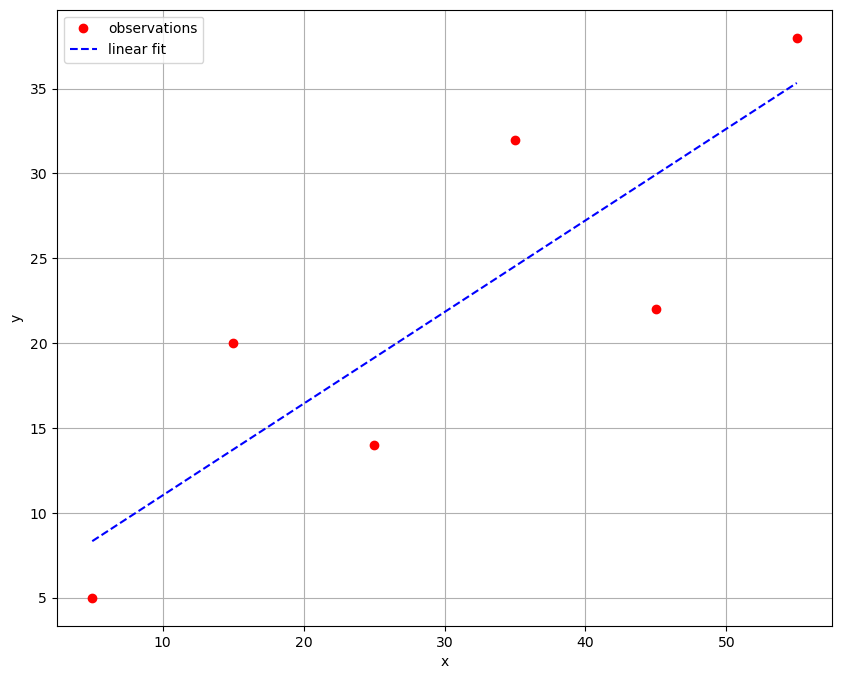

In [6]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(xa, ya, color='red', marker='o', linestyle='none', label='observations')
plt.plot(xa, alpha[0]*xa + alpha[1], color='blue', linestyle='dashed', label='linear fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

### repeat using the numpy "polyfit" method

0.54 5.633333333333347


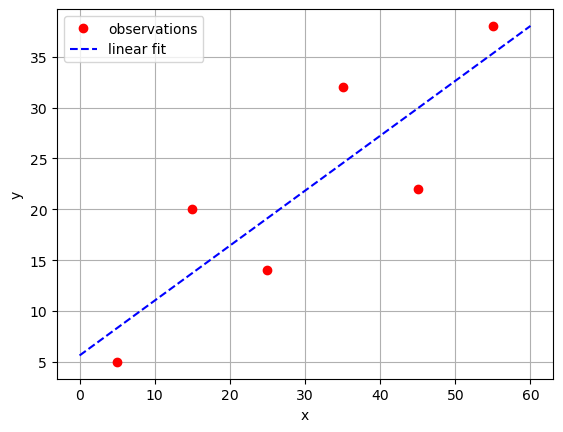

In [7]:
#slope, intercept = np.polyfit(a, b, deg=3)
m, b = np.polyfit(x, y, deg=1)
print(m,b)
x1 = np.linspace(0,60,60)
#y1 = x1 * slope + intercept
y1 = m*x1+b
plt.plot(x, y, color='red', marker='o', linestyle='none', label='observations')
plt.plot(x1, y1, color='blue', linestyle='dashed', label='linear fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

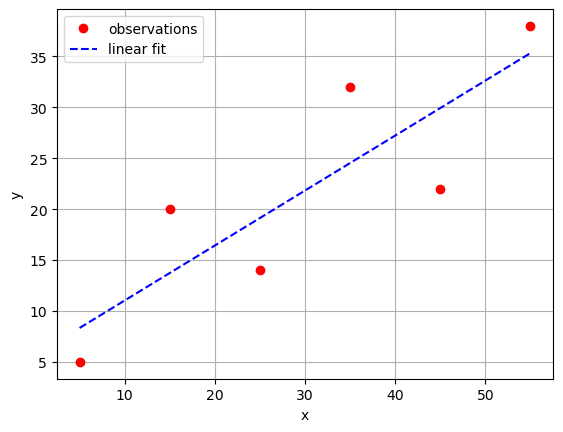

In [8]:
trend = np.polyval([m,b],x)
plt.plot(x, y, color='red', marker='o', linestyle='none', label='observations')
plt.plot(x, trend, color='blue', linestyle='dashed', label='linear fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

### Use the pseudoinverse

We talked before that the $(A^T A)^{-1} A^T$ is called the pseudo-inverse, therefore, we could use the *pinv* function in *numpy* to directly calculate it. 

[0.54       5.63333333]


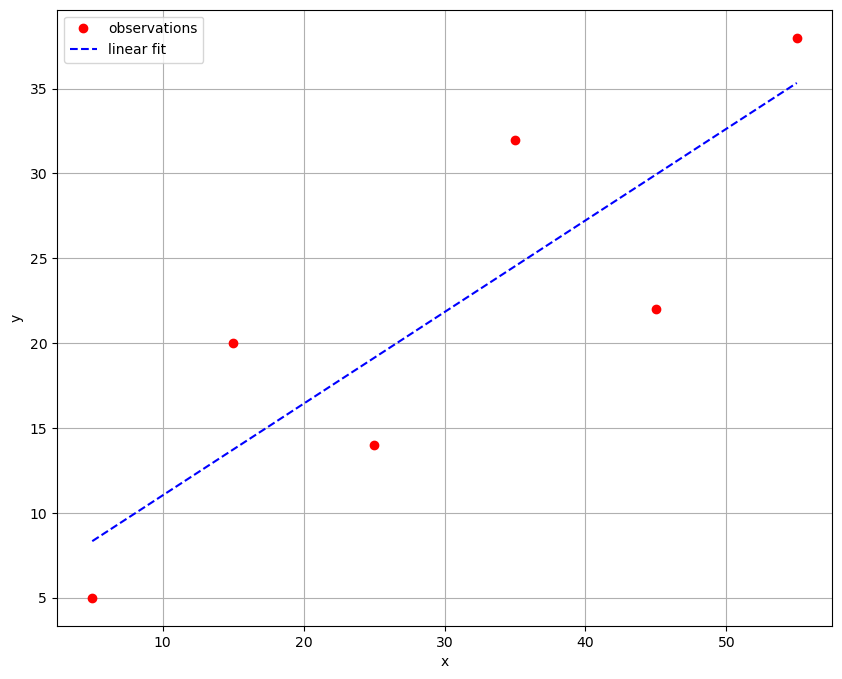

In [9]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)
plt.figure(figsize = (10,8))
plt.plot(xa, ya, color='red', marker='o', linestyle='none', label='observations')
plt.plot(xa, alpha[0]*xa + alpha[1], color='blue', linestyle='dashed', label='linear fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

### use numpy least squares linear algorithm 

In [10]:
m, b = np.linalg.lstsq(A,ya,rcond=None)[0]

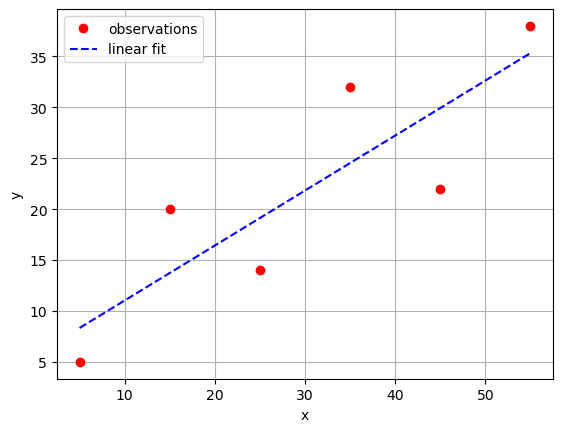

In [11]:
plt.plot(x, y, color='red',marker='o', linestyle='none', label='observations')
plt.plot(x, m*xa+b, color='blue', linestyle='dashed', label='linear fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

In [12]:
from scipy import stats
from scipy.optimize import curve_fit

### Use optimize.curve_fit from scipy

This scipy function is actually very powerful, that it can fit not only linear functions, but many different function forms, such as non-linear function. Here we will show the linear example from above. Note that, using this function, we don't need to turn y into a column vector. 

In [13]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [14]:
def func(x, a, b):
    y = a*x + b
    return y

alpha = curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)

[1.60289557 0.9585037 ]


In [15]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(url)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [16]:
from sklearn.linear_model import LinearRegression

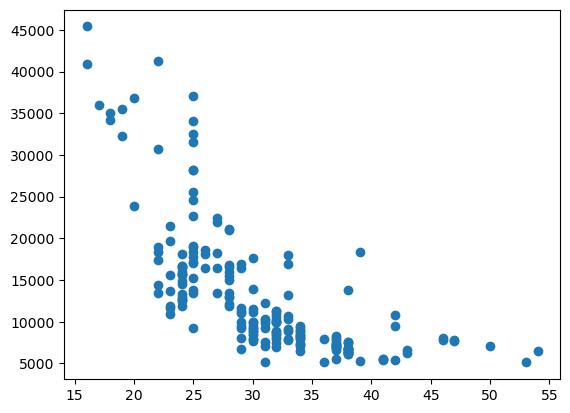

In [17]:
X = df['highway-mpg']
Y = df['price']
plt.scatter(X,Y)

In [18]:
X2 = X.values.reshape(-1, 1)
Y2 = Y.values.reshape(-1, 1)
LinearRegression().fit(X2,Y2)

LinearRegression()

In [19]:
import seaborn as sns

(0.0, 48169.20017108402)

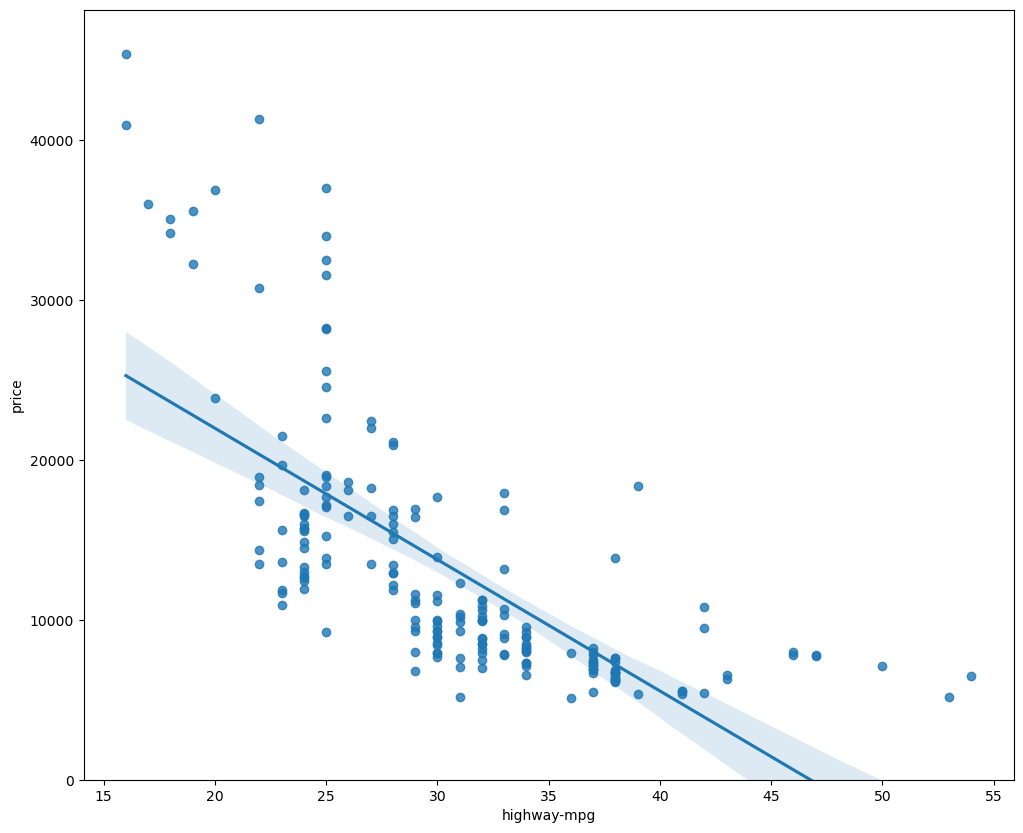

In [20]:
plt.figure(figsize=(12,10))
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)